In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
import plotly.graph_objects as go

import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import plotly.io as pio

In [26]:
xlsx_path = './Data/20250725 Adolescent TMD (visualization)_figure2.xlsx'

In [27]:
df = pd.read_excel(xlsx_path).dropna()
df.columns

Index(['Chronic TMD', 'Symptom duration', 'Treatment duration',
       'Na-Mx discrepancy amount', 'Mx-Mn discrepancy amount', 'VAS-I',
       'VAS-F', 'ADD on MRI ', 'Anterior joint space ',
       'Joint space narrowing ', 'Na-Mx discrepancy ', 'Mx-Mn discrepancy '],
      dtype='object')

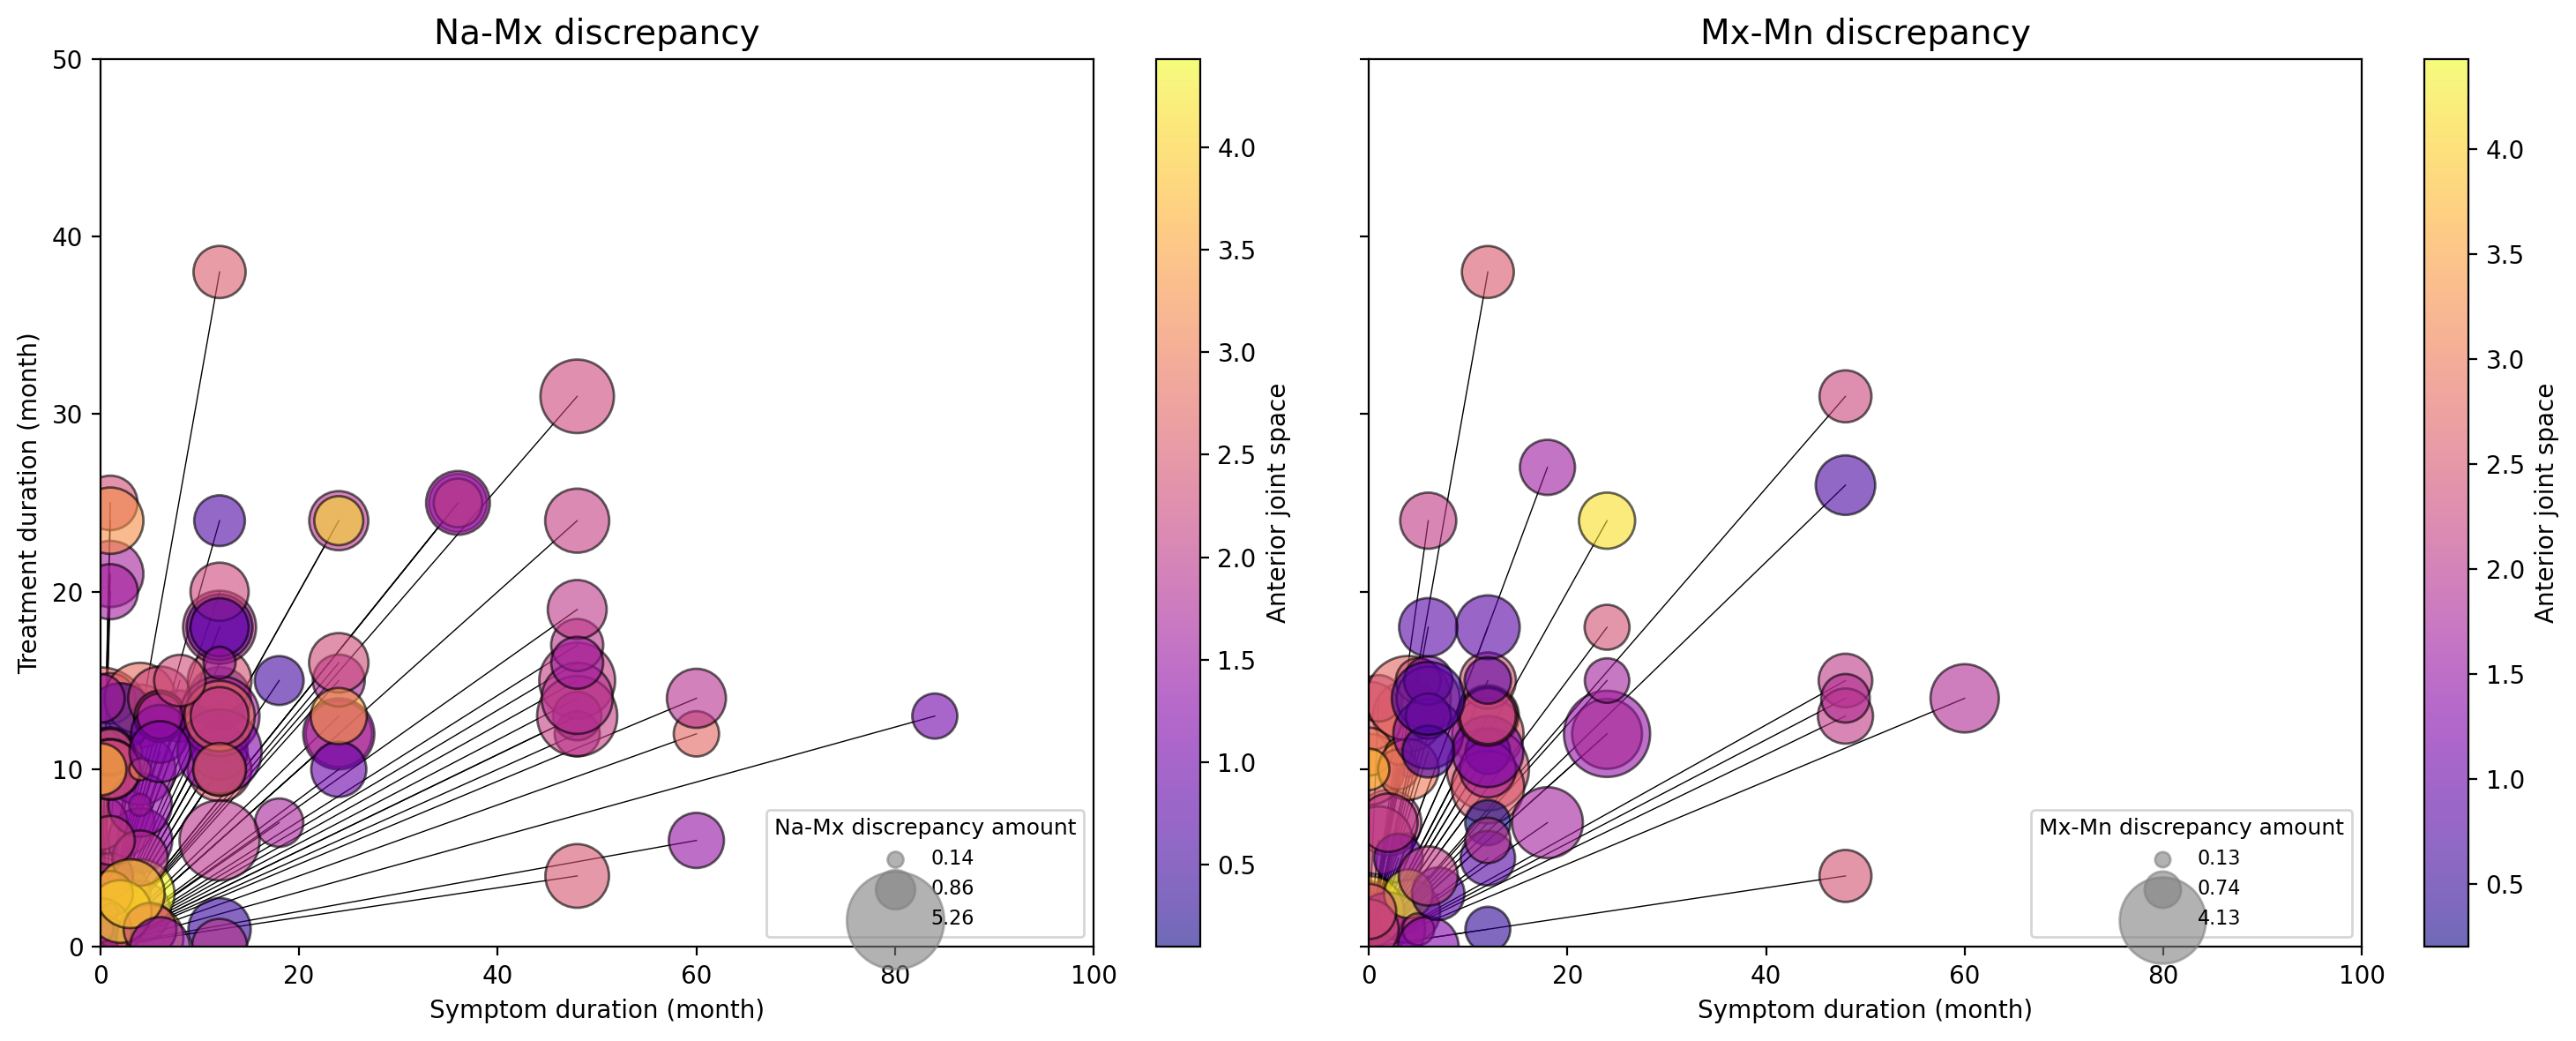

In [28]:
df.columns = df.columns.str.strip()

# 공통 설정
x = df['Symptom duration']
y = df['Treatment duration']
color = df['Anterior joint space']

# 버블 사이즈 계산 (최소값 기준)
bubble_left_raw = df['Na-Mx discrepancy amount']
bubble_right_raw = df['Mx-Mn discrepancy amount']
bubble_sizes_left = bubble_left_raw.fillna(0).clip(lower=0) * 300
bubble_sizes_right = bubble_right_raw.fillna(0).clip(lower=0) * 300

fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi=200, sharey=True)

# 왼쪽 그림
for i in range(len(df)):
    size = bubble_sizes_left[i]
    if pd.notna(size) and size > 0:
        axes[0].plot([0, x[i]], [0, y[i]], 'k-', linewidth=0.5, zorder=1)
axes[0].scatter(x[bubble_sizes_left > 0], y[bubble_sizes_left > 0],
                s=bubble_sizes_left[bubble_sizes_left > 0],
                c=color[bubble_sizes_left > 0],
                cmap='plasma', alpha=0.6, edgecolors='k', zorder=2)
axes[0].set_title("Na-Mx discrepancy", fontsize=14)
axes[0].set_xlabel("Symptom duration (month)")
axes[0].set_ylabel("Treatment duration (month)")
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 50)
cbar1 = fig.colorbar(sc1 := axes[0].collections[0], ax=axes[0])
cbar1.set_label("Anterior joint space")

# 오른쪽 그림
for i in range(len(df)):
    size = bubble_sizes_right[i]
    if pd.notna(size) and size > 0:
        axes[1].plot([0, x[i]], [0, y[i]], 'k-', linewidth=0.5, zorder=1)
axes[1].scatter(x[bubble_sizes_right > 0], y[bubble_sizes_right > 0],
                s=bubble_sizes_right[bubble_sizes_right > 0],
                c=color[bubble_sizes_right > 0],
                cmap='plasma', alpha=0.6, edgecolors='k', zorder=2)
axes[1].set_title("Mx-Mn discrepancy", fontsize=14)
axes[1].set_xlabel("Symptom duration (month)")
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 50)
cbar2 = fig.colorbar(sc2 := axes[1].collections[0], ax=axes[1])
cbar2.set_label("Anterior joint space")

# 수동 범례 설정
manual_sizes = {
    'Na-Mx discrepancy amount': [0.14, 0.86, 5.26],
    'Mx-Mn discrepancy amount': [0.13, 0.74, 4.13]
}
for ax, title, sizes in zip(axes, manual_sizes.keys(), manual_sizes.values()):
    handles = [plt.scatter([], [], s=s*300, color='gray', alpha=0.6) for s in sizes]
    labels = [f"{s:.2f}" for s in sizes]
    ax.legend(handles, labels, title=title, loc='lower right', fontsize=8, title_fontsize=9)

plt.tight_layout()
plt.show()